In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.VGG16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

from keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
pip install -q tf-nightly

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'datasets/Train'
valid_path = 'datasets/Test'



vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
folders = glob('datasets/train/*')

x = Flatten()(vgg.output)

x= Dropout(0.5)(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

Found 1057 images belonging to 4 classes.
Found 49 images belonging to 4 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
34/34 [==============================] - 540s 16s/step - loss: 1.5905 - accuracy: 0.4087 - val_loss: 1.1287 - val_accuracy: 0.4286
Epoch 2/5
34/34 [==============================] - 458s 13s/step - loss: 1.0505 - accuracy: 0.5648 - val_loss: 0.6547 - val_accuracy: 0.6939
Epoch 3/5
34/34 [==============================] - 457s 13s/step - loss: 0.7582 - accuracy: 0.6793 - val_loss: 0.7646 - val_accuracy: 0.6327
Epoch 4/5
34/34 [==============================] - 423s 12s/step - loss: 0.6527 - accuracy: 0.7200 - val_loss: 0.6972 - val_accuracy: 0.6735
Epoch 5/5
34/34 [==============================] - 286s 8s/step - loss: 0.6676 - accuracy: 0.7351 - val_loss: 0.7969 - val_accuracy: 0.6122


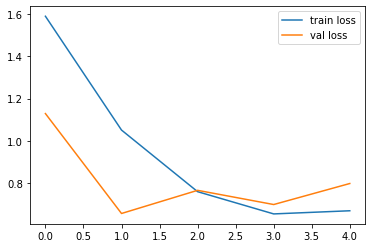

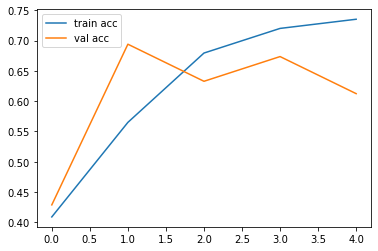

In [3]:
# Decide cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use  Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
